## Movie Poster Emotion Analysis


### Introduction

There are many ways to decide if you would like to Watch a movie. Here is a list of common ways to make this decision. 

+ 1. Read move critics
+ 2. Watch trailers
+ 3. Friends recommendation
+ ...

But sometimes, strongly enough, you might have found yourself making this decision based on a quick glance of the movie poster. There is something about the movie poster that grabs your initial attention. Something that makes you at least a little curious to read the movie description. 

What is that? Is it really important? Do we really pick a movie based on their cover? 

These are the questions that I had when I though about the modern way of selecting movies. May be the single best question to summarize this analysis is to know: 

Do we really select a movie to watch based on their poster/cover? 

or even

Does movie poster **"Facial Expression"** matters toward its **"popularity"**?


I decided to answer this question by collecting relevant data and posters. My intention is to continue this project and refine it as I get more experienced with ***deep-learning*** and image ***Emotion Detection***. There are endless ways to answer this question. However, as for my first attempt, I decided to study one of the most common feature of movie posters; **Human Face** and **Human Facial Expression**. Here, the initial idea is to understand the importance of human face on movie posters. Are we more likely to watch a movie when there is a human face on the cover? What about the expression? Is that important? Are "**Happy**" movies more popular than **"Sad"** movies? 

In this analysis, the `Vote_Count` variable is assumed to be a valid representative of viewer's interest and therefore the response variable. 

### Data and methods

#### Movie Data:
There are a few ways to collect movie related stats. There are a few publicly available datasets on Kaggle that have movie stats. I was inspired  particularly by [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata). This is a nice dataset and has the structure and framework that I was seeking. It doesn't, however, come with posters. It also has a dataframe that needs cleaning. That is why I decided to "scrape" my own data from the [TMDB](https://www.themoviedb.org/) website. Many thanks to the organizers of this website and their openness to developers. 

TMDB provide many python APIs from which I used [tmdbsimple](https://github.com/celiao/tmdbsimple/) (can be installed from GitHub). 

In [2]:
import tmdbsimple as tmdb
import urllib.request
import pandas as pd
import re

In [ ]:
tmdb.API_KEY = 'USER_SPECIFIC_Key'

Using the above API, I retrieved a a list of ~4400 movies from TMDB. There are various information available for each title among which I store the following:

+ 1. Title
+ 2. Budget
+ 3. Genre
+ 4. Original Language
+ 5. Popularity
+ 6. Revenue
+ 7. Runtime
+ 8. User Rating
+ 9. Vote Count
+ 10. Poster URL, and
+ 11. Movie ID
+ 12. Release Date

Finally, by passing the URL of the poster to my code, I was able to compile all of the movie poster for the received titles. 

In [ ]:
search = tmdb.Search()

# Now we have the id of all of our movies, we will procced to download their poster from the TMDB
mdic = {}
mdb = {}

title = []
budget = []
genre1 = []
org_lan = []
pop = []
rev = []
run = []
rate = []
v_count = []
poster = []
poster_url = []
r_date = []
m_ids = []

for ids in m_id:
    mv = tmdb.Movies(ids)
    mv.info()
    #The location of the poster in the following dictionary is:
    tt = re.sub(r"[^a-zA-Z0-9]+"," " , mv.title)
    m_ids.append(mv.id)
    title.append(mv.title)
    budget.append(mv.budget)
    genre1.append(mv.genres[0]['name'])
    org_lan.append(mv.original_language)
    pop.append(mv.popularity)
    rev.append(mv.revenue)
    run.append(mv.runtime)
    rate.append(mv.vote_average)
    v_count.append(mv.vote_count)
    poster.append(mv.poster_path)
    r_date.append(mv.r_date)
    # The absolute url
    url = 'https://image.tmdb.org/t/p/original'
    im_url = url + mv.poster_path
    poster_url.append(im_url)
    #Lets Download the poster and save it in the movie poster folder
    urllib.request.urlretrieve(im_url, outdir + str(ids) + '.jpg')

Finally, I was able to contruct a dataframe containing all of the above information.

In [ ]:
# Construct the daraframe
m_df = pd.DataFrame({'Movie_ID':m_ids,
                     'Title':title,
                     'Budget':budget,
                     'Original_Language':org_lan,
                     'popularity': pop,
                     'release_date': r_date,
                     'Revenue' :rev,
                     'Runtime' :run,
                     'Rating':rate,
                     'Vote_Count':v_count,
                     'Poster_url':poster_url})

The constructed dataframe look like this:

In [8]:
# Movie DataFr
# Since this is not a "live" snipit, I'll be imorting the downloaded dataframe from HDD.
m_df = pd.read_csv('/home/fyousef/face_rec/MOVIE_5000/movies_TMDB.csv')
m_df.head(5)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Poster_url
0,868,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137,https://image.tmdb.org/t/p/original/6ylcfUctX2...
1,17654,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066,https://image.tmdb.org/t/p/original/axFmCRNQsW...
2,1725,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727,https://image.tmdb.org/t/p/original/zRQhCSREdR...
3,7347,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896,https://image.tmdb.org/t/p/original/soOOLcNFRH...
4,12405,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195,https://image.tmdb.org/t/p/original/gWE4R4DjcU...


The dataframe was finally saved to HDD.

In [ ]:
# Save the dataframe
m_df.to_csv('movies_TMDB.csv', sep=",")

#### Poster Analysis

The second part of this data gathering was spent on performing **Face Recognition** and **Emotion Detection** on the images. The area of face detection and emotional analysis is very new and contains complex algorithms. Many of the above techniques requires knowledge of **deep-learning** and **machine-learning**. I used the `face_recognition` module from GitHub(https://github.com/ageitgey/face_recognition) for facial recognition. This is a simple, yet efficient tool to quickly find faces in the movie posters. The caveat is that the ability of the detecting faces is dependent upon the image resolution. The above module find less number of faces in similar small size posters compared to larger (1200x2000 pixel) posters. Therefore, one should be willing to sacrifice computation time for accurate detection (albeit with avialbility of higher resolution posters). 

I also used the newly distributed [`EmoPy`](https://github.com/thoughtworksarts/EmoPy) module for facial emotion recognition. This package uses **TensorFlow** and deep-learning to train and detect existing emotions of a face in the poster. This module has many detection levels and uses deep-learning to detect the facial emotions. Processing time is significant for this module. The following is the code snippet for face recognition and emotion detection. The above work yield two final parameters:

+ 1. Face Score (a float between 0 to 3 for each movie poster representing the general facial expression). 0 means angry, and 3 means happy. 2 is a middle state representing calmness. This value is averaged for all the detected faces in the movie poster.
+ 2. Face Count (summarizes the detected number of faces at the available poster resolution)

In [ ]:
from PIL import Image
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pickle
import pandas as np

# The EmoPy Package for emotion detection
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename

I also wrote two functions to automate the face recognition and emotion detection for the ~4400 movie posters. 

In [ ]:
# Face_emotion_function
def f_location(f_l):
    emos = []
    for face_location in f_l:
        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: 
              {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

        # You can access the actual face itself like this:
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        #plt.figure() # to make a new empty plot so it shows all the faces in one page!
        #plt.imshow(pil_image)
        pil_image.save('IM_obj.jpg')
        target_emotions = ['calm','anger','happiness']
        model = FERModel(target_emotions, verbose=True)
        model.predict('IM_obj.jpg')
        file = open('emot.txt','r')
        emo = file.read()
        emos.append(emo)
        file.close()
    return emos

In [ ]:
# Emotion_summary_function or f_score function
def emo_score(emos):
    score  = []
    for n in emos:
        if n == 'anger':
            score.append(1)
        elif n == 'calm':
            score.append(2)
        elif n == 'happiness':
            score.append(3)
    try:
        f_score = sum(score)/len(score)
        return f_score
    except ZeroDivisionError: 
        f_score = 'nan'

The following code section uses the above functions to summarize and store our metrics. 

In [ ]:
# The code below does 2 things!
# 1) Gets the file name (which is the image ID)
# 2) Reads each image in the directory into face_recognition package!
m_id = [] # Movie ID
m_fs = [] # Face Score
m_nf = [] # Number of faces

for mlist in glob.glob(os.path.join(im_list, '*.txt')):
    print(mlist)
    with open(mlist, 'rb') as f:
        lst = pickle.load(f)
        for item in lst:
            m_id.append(os.path.splitext(os.path.basename(item))[0])
            print(item)
            image = face_recognition.load_image_file(item)
            face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")
            print("I found {} face(s) in this photograph.".format(len(face_locations)))
            emo = f_location(face_locations)
            fs = emo_score(emo)
            m_fs.append(fs)
            m_nf.append(len(face_locations))

print(m_id)
print(m_fs)
print(m_nf)

#### Note
Again, since this is not a "live" code, and poster processing (~16 hrs for ~4400 posters) has been preformed separately, we will be using the stored data.

In [7]:
# Reading the emotion data frame
e_df = pd.read_csv('/home/fyousef/face_rec/MOVIE_5000/movies_emo_score.csv')
e_df.head(5)

,Movie_ID,Face_score,Face_count
0,38970,2.333333,3
1,38985,1.000000,1
2,39013,3.000000,1
3,3902,NaN,0
4,39037,3.000000,3


## Analysis
The rest of this document is dedicated to analysis and data visualization of the collected data. The two data frames will be merged using the movie ID. The final table will be our dataset for this project.

In [95]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# To ignore the warnings for the sake of simplicity!
import warnings
warnings.filterwarnings('ignore')

In [9]:
%matplotlib inline

In [35]:
# Dataframes:
m_df = pd.read_csv('C:/Users/fyousef/Documents/Kaggle/face_Rec/csv_data/movies_TMDB.csv') # The TMDB Dataset
e_df = pd.read_csv('C:/Users/fyousef/Documents/Kaggle/face_Rec/csv_data/movies_emo_score.csv') # The Emotion Dataset

In [36]:
print('The Movie Dataset')
print(m_df.head(5))

print('and the Emotion Dataset')
print(e_df.head(5))

The Movie Dataset
   Movie_ID                Title    Budget Original_Language  popularity  \
0       868               Tsotsi   3000000                af    2.504169   
1     17654           District 9  30000000                en   63.136780   
2      1725      West Side Story   6000000                en   23.431117   
3      7347          Elite Squad   4000000                pt   23.604936   
4     12405  Slumdog Millionaire  15000000                en   59.258969   

  release_date    Revenue  Runtime  Rating  Vote_Count  \
0    8/18/2005    9879971     94.0     7.0         137   
1     8/5/2009  210819611    112.0     7.3        5066   
2   10/18/1961   43656822    152.0     7.3         727   
3   10/12/2007          0    115.0     8.0         896   
4    5/12/2008  377910544    120.0     7.7        5195   

                                          Poster_url  
0  https://image.tmdb.org/t/p/original/6ylcfUctX2...  
1  https://image.tmdb.org/t/p/original/axFmCRNQsW...  
2  https://

They both share the `Movie_ID` column, so the merging will be based on that column.

## Analysis Strategy
We will be following a strict path from hereon forward to achieve the goal of this analysis. 

+ 1. Keep the data within its original boundary (TMDB, and Emotion) and get to know the data a little more
+ 2. Get to know our parameters and perform some data cleaning
+ 3. Make a pairplot and core plot for the TMDB dataset and analyze the outcome
    - a. What is the relationship between Vote Count and Rating?
    - b. Does it help to use Vote Count as a measure of viewers **"happiness"** with a movie?
+ 4. Make a pairplot and correlation plot for Emotion dataframe
+ 5. Further explore the relationship between Emotion and TMDB variables (vote count, rating, popularity, etc.)
+ 6. Select our potential variables for machine learning
+ 7. Perform a simple Naive-Bayes Analysis in predicting the Vote Count from Emotional cues 
+ 8. Discuss the results

In [37]:
m_df.head(5)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Poster_url
0,868,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137,https://image.tmdb.org/t/p/original/6ylcfUctX2...
1,17654,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066,https://image.tmdb.org/t/p/original/axFmCRNQsW...
2,1725,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727,https://image.tmdb.org/t/p/original/zRQhCSREdR...
3,7347,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896,https://image.tmdb.org/t/p/original/soOOLcNFRH...
4,12405,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195,https://image.tmdb.org/t/p/original/gWE4R4DjcU...


We don't need all of the above columns for out analysis. Therefore, Poster_url column can be removed from the dataframe.

In [38]:
m_df = m_df.drop(["Poster_url"], axis=1)
m_df.head(10)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count
0,868,Tsotsi,3000000,af,2.504169,8/18/2005,9879971,94.0,7.0,137
1,17654,District 9,30000000,en,63.136780,8/5/2009,210819611,112.0,7.3,5066
2,1725,West Side Story,6000000,en,23.431117,10/18/1961,43656822,152.0,7.3,727
3,7347,Elite Squad,4000000,pt,23.604936,10/12/2007,0,115.0,8.0,896
4,12405,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544,120.0,7.7,5195
5,13600,City of Ember,55000000,en,23.465539,10/7/2008,17869048,90.0,6.2,895
6,38780,Rampage,0,en,7.101197,8/14/2009,0,85.0,5.9,186
7,8487,Wild Wild West,170000000,en,40.748915,6/29/1999,222104681,106.0,5.2,1646
8,9433,The Edge,0,en,20.632673,9/6/1997,43312294,117.0,6.7,539
9,340816,Christmas Eve,0,en,1.985243,12/4/2015,0,95.0,5.5,37


One thing that I noticed and might be important is that we have a lot of zeros for Revenue and Budget columns. What does this means? Does it mean that those movies never sold a thicket or spend a dollar for production? Probably not true! 

The other thing is that revenue and budget are slightly subjective since they change with strength of dollar. However, they are still good indicators of viewers investment and interest in that movie. So we will keep them for now. 

Let attempt to replace those 0's with NaN in both `Revenue` and `Budget` columns.

In [39]:
m_df['Revenue'] = m_df['Revenue'].replace({0: np.NaN})
m_df.head(10)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count
0,868,Tsotsi,3000000,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137
1,17654,District 9,30000000,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066
2,1725,West Side Story,6000000,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727
3,7347,Elite Squad,4000000,pt,23.604936,10/12/2007,NaN,115.0,8.0,896
4,12405,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195
5,13600,City of Ember,55000000,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895
6,38780,Rampage,0,en,7.101197,8/14/2009,NaN,85.0,5.9,186
7,8487,Wild Wild West,170000000,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646
8,9433,The Edge,0,en,20.632673,9/6/1997,43312294.0,117.0,6.7,539
9,340816,Christmas Eve,0,en,1.985243,12/4/2015,NaN,95.0,5.5,37


In [40]:
m_df['Budget'] = m_df['Budget'].replace({0: np.NaN})
m_df.head(10)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count
0,868,Tsotsi,3000000.0,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137
1,17654,District 9,30000000.0,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066
2,1725,West Side Story,6000000.0,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727
3,7347,Elite Squad,4000000.0,pt,23.604936,10/12/2007,NaN,115.0,8.0,896
4,12405,Slumdog Millionaire,15000000.0,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195
5,13600,City of Ember,55000000.0,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895
6,38780,Rampage,NaN,en,7.101197,8/14/2009,NaN,85.0,5.9,186
7,8487,Wild Wild West,170000000.0,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646
8,9433,The Edge,NaN,en,20.632673,9/6/1997,43312294.0,117.0,6.7,539
9,340816,Christmas Eve,NaN,en,1.985243,12/4/2015,NaN,95.0,5.5,37


Lets take a look at our datatypes:

In [41]:
#Checking out the datatype:
m_df.dtypes

Movie_ID               int64
Title                 object
Budget               float64
Original_Language     object
popularity           float64
release_date          object
Revenue              float64
Runtime              float64
Rating               float64
Vote_Count             int64
dtype: object

The release_date columns is an object whereas ideally is should be data/time. Lets change that. 

In [59]:
# Changing the datatype to Date
test = pd.to_datetime(m_df.release_date, format='%m/%d/%Y', errors='ignore')

In [43]:
type(test)

pandas.core.series.Series

Then we will replace it with the column in the dataframe. 

Lets take a final look at our TMDB dataframe

In [44]:
m_df.head(10)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count
0,868,Tsotsi,3000000.0,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137
1,17654,District 9,30000000.0,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066
2,1725,West Side Story,6000000.0,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727
3,7347,Elite Squad,4000000.0,pt,23.604936,10/12/2007,NaN,115.0,8.0,896
4,12405,Slumdog Millionaire,15000000.0,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195
5,13600,City of Ember,55000000.0,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895
6,38780,Rampage,NaN,en,7.101197,8/14/2009,NaN,85.0,5.9,186
7,8487,Wild Wild West,170000000.0,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646
8,9433,The Edge,NaN,en,20.632673,9/6/1997,43312294.0,117.0,6.7,539
9,340816,Christmas Eve,NaN,en,1.985243,12/4/2015,NaN,95.0,5.5,37


We are not going to be doing **sentiment** analysis on the movie name, so we can potential remove that variable from our analysis as well. Other than that, we can use the rest of the variables for our analysis. Let's start with some visualization. 

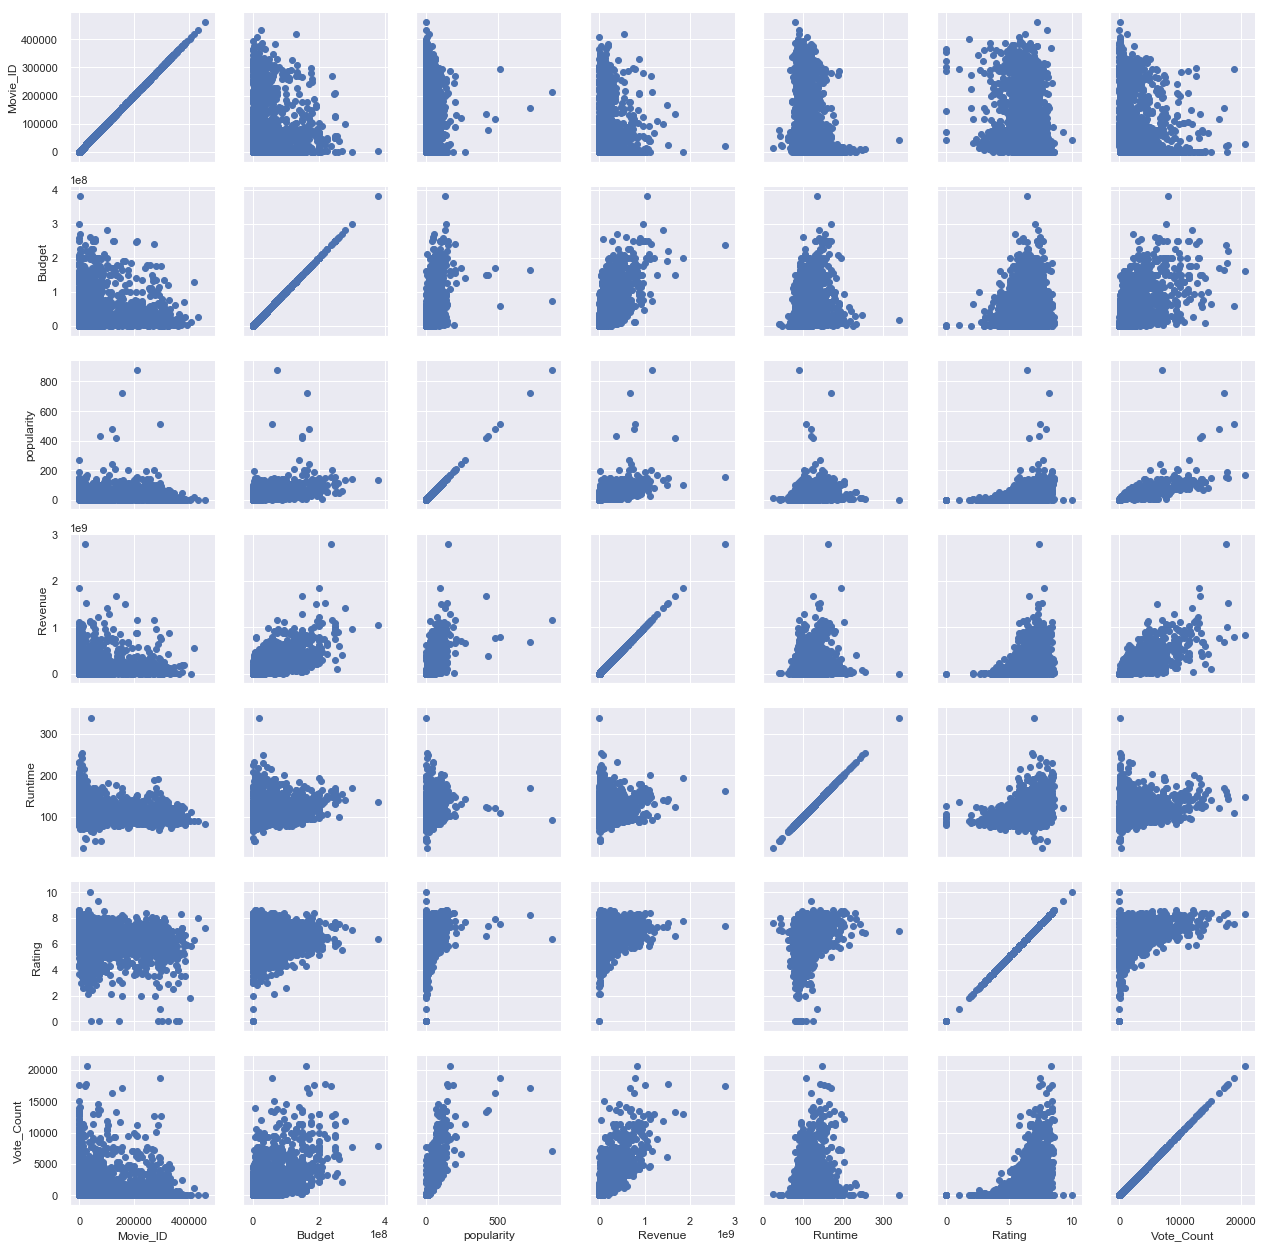

In [123]:
# Set the default Seaborn theme!
sns.set()

g = sns.PairGrid(data=m_df)
g = g.map(plt.scatter)

The heatmap will complete the picture. 

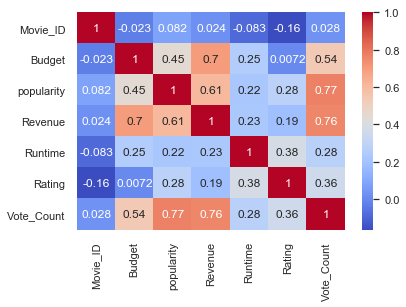

In [46]:
sns.heatmap(m_df.corr(),cmap='coolwarm',annot=True)

#### Selecting variables

It appears that the most descriptive variables for `Vote_count` are `popularity` (cor.coef= 0.77) and `Revenue`(cor.coef= 0.76). This means that if we where to predict for vote_count, we can use this two variables in our model. There are some caveats here. One can argue that *revenue* is not deriving the vote_count and in fact it is the vote count that can lead to higher revenue. This might be true as the more positive a movie gets it more likely that people are encouraged to recommend it to others directly or indirectly. 

As for the popularity, this is the official description of **TMDB** for their `popularity` variable:

```
Number of votes for the day
Number of views for the day
Number of users who marked it as a "favourite" for the day
Number of users who added it to their "watchlist" for the day
Release date
Number of total votes
Previous days score
```

So basically, this variable is coming from user interaction with the site. While one might argue that the more interaction with the site, the more likely that the person might vote, and hence these to variables are autocorrelated, one can also argue that this interaction is not always in favor of the movie. Therefore, `popularity` could be interpreted as the day-to-day broad interaction of the user with site, while `vote_count` is only a narrower function of popularity factor over a long-term period. We can, therefore, qualify them as independent and consider them as predictive variables.   

We will further look at some properties of these two variables and how they interact with our *Emotion* variables. But first we need to clean up the *Emotion* variable. 

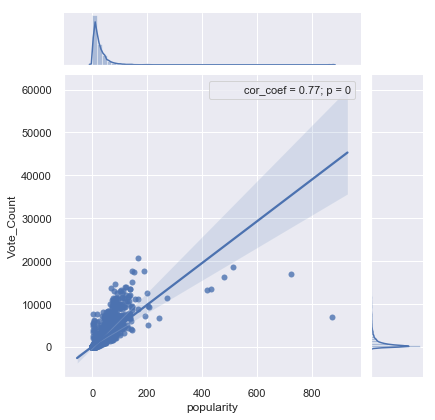

In [47]:
# looking closer at the popularity and revenue vs. Vote_count
from scipy import stats
def cor_coef(x, y):
    return stats.pearsonr(x, y)[0], stats.pearsonr(x, y)[1]
sns.jointplot(x='popularity', y='Vote_Count', data=m_df, kind='reg', stat_func=cor_coef)

What if we drop popularity values above 400!

In [48]:
Pop_RM_out = m_df[m_df.popularity < 400]

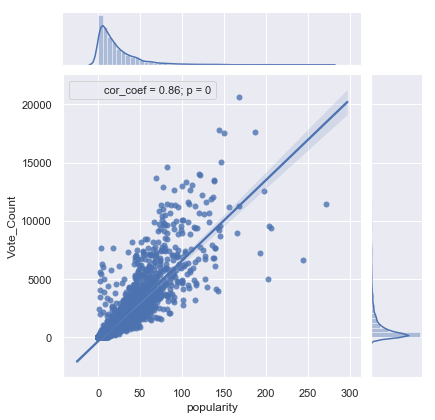

In [49]:
sns.jointplot(x='popularity', y='Vote_Count', data= Pop_RM_out, kind='reg', stat_func=cor_coef)

There seems to be a significant improvement here. 
**Warning:** I am aware that this might cause over fitting in the future. But for now we will work with the "outlier" removed dataset. 

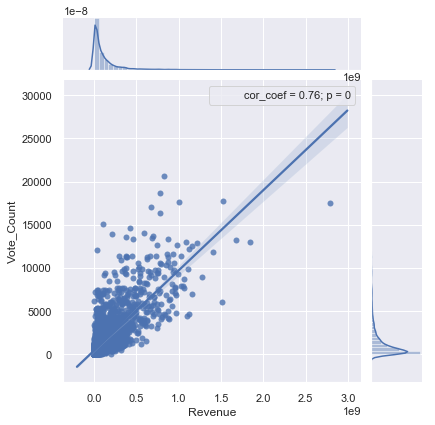

In [50]:
# and Revenue vs. Vote_Count
sns.jointplot(x='Revenue', y='Vote_Count', data=m_df, kind='reg', stat_func=cor_coef)

How is the removed data going to impact the `Revenue` prediction?

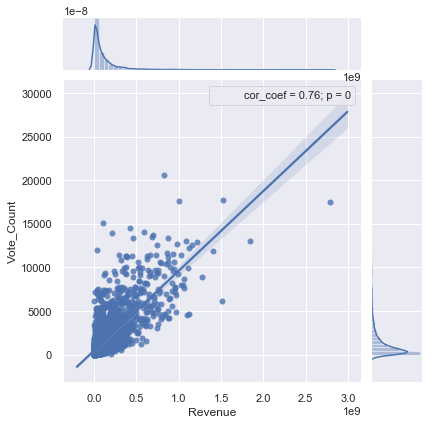

In [51]:
sns.jointplot(x='Revenue', y='Vote_Count', data=Pop_RM_out, kind='reg', stat_func=cor_coef)

A final look at the heatmap of the movie database!

Before


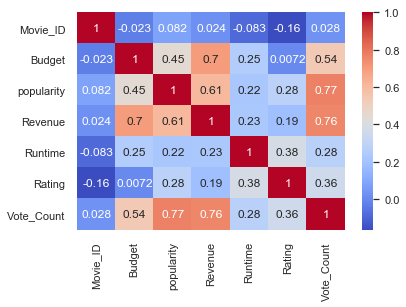

After


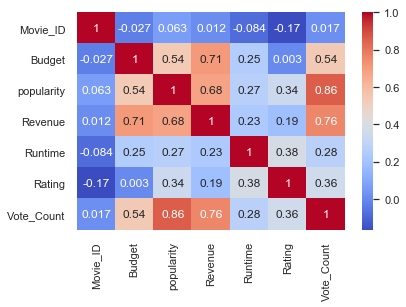

In [52]:
print('Before')
g = sns.heatmap(m_df.corr(),cmap='coolwarm',annot=True)
plt.show()
print('After')
g = sns.heatmap(Pop_RM_out.corr(),cmap='coolwarm',annot=True)
plt.show()

Now let's play around with the *Emotion* dataframe!

In [53]:
e_df.head(10)

,Movie_ID,Face_score,Face_count
0,38970,2.333333,3
1,38985,1.000000,1
2,39013,3.000000,1
3,3902,NaN,0
4,39037,3.000000,3
5,39053,2.333333,3
6,39055,2.666667,3
7,391,NaN,0
8,39141,3.000000,3
9,39180,NaN,0


As can be noted here, we have `NaN` in the `Face_score` field. There is also the `Movie_ID` field that will be later used to merge the two dataframes. 

### Adding more Categorical fields
As it is very evident here, we lack categorical fields in this table. Sometimes, dissecting these variables based on their "attributes" will help in finding patterns in sub-sections of the datasets. One useful categorical field that I can think of is "Presence/Absence" of a human face. Does the poster have face or not?

This can be easily added as a binary variable.

In [54]:
# To make a binary face 
Face_Presence = map(lambda x: 0 if x == 0 else 1, e_df.Face_count)
Face_Presence = list(Face_Presence)

Let's add this back to our dataframe!

In [55]:
e_df['Face_presence']= Face_Presence
e_df.head(10)

,Movie_ID,Face_score,Face_count,Face_presence
0,38970,2.333333,3,1
1,38985,1.000000,1,1
2,39013,3.000000,1,1
3,3902,NaN,0,0
4,39037,3.000000,3,1
5,39053,2.333333,3,1
6,39055,2.666667,3,1
7,391,NaN,0,0
8,39141,3.000000,3,1
9,39180,NaN,0,0


We will also perform data visualization before we proceed with joining the tables. 

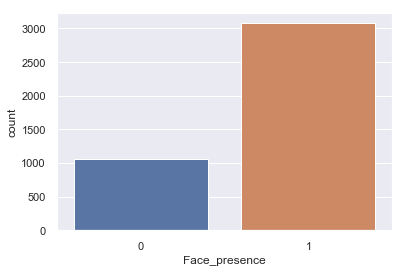

In [67]:
# Removed the Movie_ID column for visualisation!
e_dfd = e_df.drop('Movie_ID', axis=1)

sns.countplot(x='Face_presence', data=e_dfd)

Over 3000 of out titles have human faces on them! This means that our data is skewed toward "with face" posters. What about the # of faces?

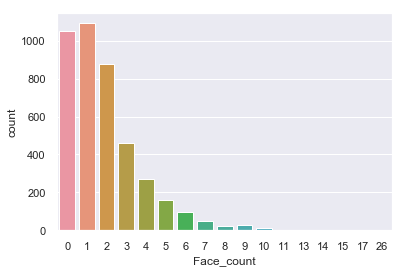

In [68]:
sns.countplot(x='Face_count', data=e_dfd)

Nice, the majority of the movies have 1 face in them. Which movie has 26 faces on it???? For this we need to join the tables! Lastly, lets see the distribution of `Face_score` for our dataset. For this we would need to drop the movie with no face on them. 

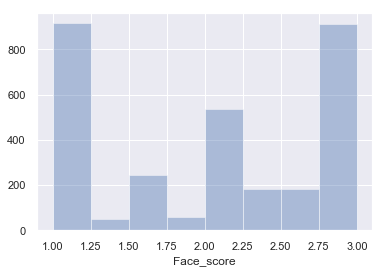

In [104]:
e_dfd_droped = e_dfd.dropna()
sns.distplot(e_dfd_droped['Face_score'], kde=False)

From the look of it, I am dealing with a multi-modal variable. Therefore, I would want to also try to make a categorical variable out of the `Face_score` variable by rounding the values. 

In [101]:
e_df['Face_score_round'] = e_df['Face_score'].round()
e_df.head(10)

,Movie_ID,Face_score,Face_count,Face_presence,Face_score_round
0,38970,2.333333,3,1,2.0
1,38985,1.000000,1,1,1.0
2,39013,3.000000,1,1,3.0
3,3902,NaN,0,0,NaN
4,39037,3.000000,3,1,3.0
5,39053,2.333333,3,1,2.0
6,39055,2.666667,3,1,3.0
7,391,NaN,0,0,NaN
8,39141,3.000000,3,1,3.0
9,39180,NaN,0,0,NaN


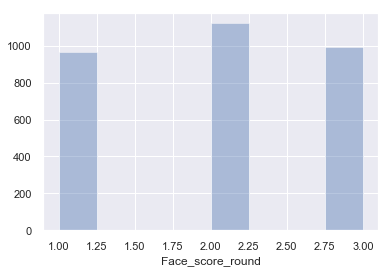

In [105]:
e_dfd_droped = e_df.dropna()
sns.distplot(e_dfd_droped['Face_score_round'], kde=False)

This suggest that the majority of the movies have a calm poster expression. 

## Combining the datasets
Finally, let's join the two tables and have everything in one place!

In [107]:
df = pd.merge(Pop_RM_out, e_df, on='Movie_ID', left_index=True)
df.head(5)

,Movie_ID,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_presence,Face_score_round
2231,868,Tsotsi,3000000.0,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137,1.0,1,1,1.0
2827,17654,District 9,30000000.0,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066,NaN,0,0,NaN
2918,1725,West Side Story,6000000.0,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727,NaN,0,0,NaN
1473,7347,Elite Squad,4000000.0,pt,23.604936,10/12/2007,NaN,115.0,8.0,896,1.0,2,1,1.0
631,12405,Slumdog Millionaire,15000000.0,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195,3.0,2,1,3.0


Let's visualize some of our data layers. 

In [109]:
# The list of our columns
df.columns

Index(['Movie_ID', 'Title', 'Budget', 'Original_Language', 'popularity',
       'release_date', 'Revenue', 'Runtime', 'Rating', 'Vote_Count',
       'Face_score', 'Face_count', 'Face_presence', 'Face_score_round'],
      dtype='object')

In [166]:
# Subset the data into meaningfull variables:
f_df = df[['Budget', 'Original_Language', 'popularity',
       'release_date', 'Revenue', 'Rating', 'Vote_Count',
       'Face_score', 'Face_count', 'Face_presence', 'Face_score_round']]
f_df.head(10)

,Budget,Original_Language,popularity,release_date,Revenue,Rating,Vote_Count,Face_score,Face_count,Face_presence,Face_score_round
2231,3000000.0,af,2.504169,8/18/2005,9879971.0,7.0,137,1.000000,1,1,1.0
2827,30000000.0,en,63.136780,8/5/2009,210819611.0,7.3,5066,NaN,0,0,NaN
2918,6000000.0,en,23.431117,10/18/1961,43656822.0,7.3,727,NaN,0,0,NaN
1473,4000000.0,pt,23.604936,10/12/2007,NaN,8.0,896,1.000000,2,1,1.0
631,15000000.0,en,59.258969,5/12/2008,377910544.0,7.7,5195,3.000000,2,1,3.0
3835,55000000.0,en,23.465539,10/7/2008,17869048.0,6.2,895,NaN,0,0,NaN
2882,NaN,en,7.101197,8/14/2009,NaN,5.9,186,NaN,0,0,NaN
2230,170000000.0,en,40.748915,6/29/1999,222104681.0,5.2,1646,1.666667,3,1,2.0
2690,NaN,en,1.985243,12/4/2015,NaN,5.5,37,2.428571,7,1,2.0
1070,15000000.0,en,19.913961,8/7/2008,3533227.0,6.0,412,3.000000,1,1,3.0


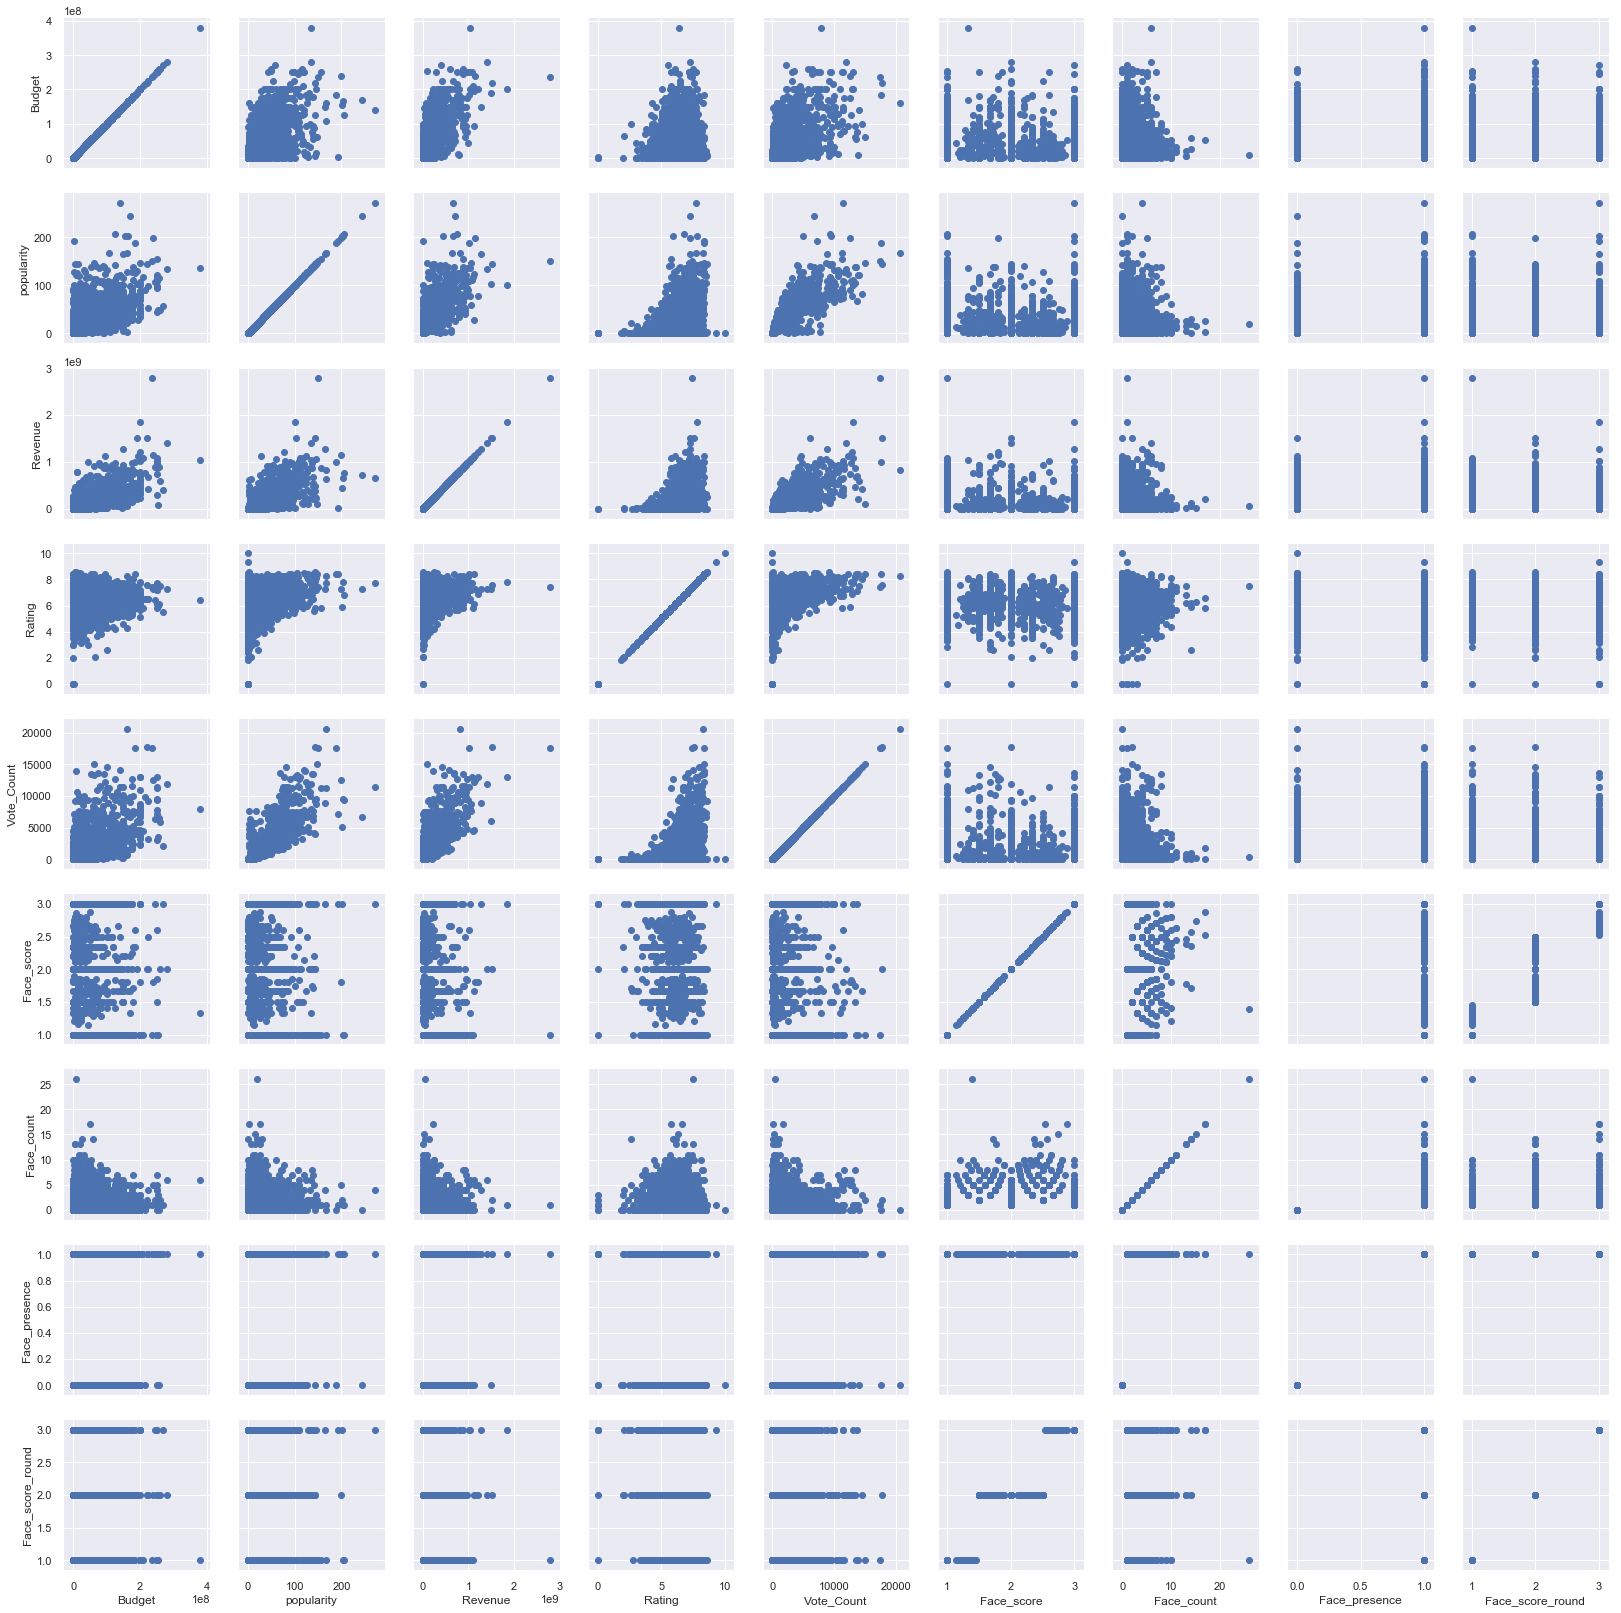

In [128]:
g2 = sns.PairGrid(data=f_df)
g2 = g2.map(plt.scatter)

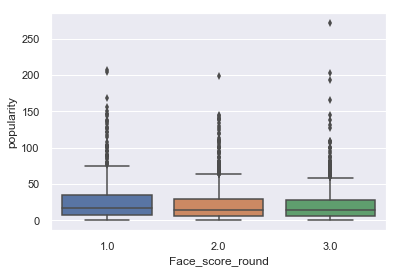

In [126]:
sns.boxplot(x='Face_score_round', y='popularity', data=f_df)

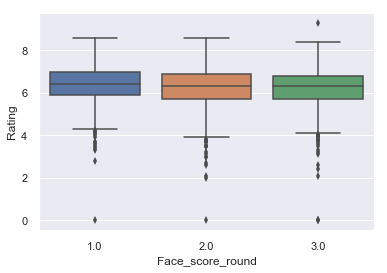

In [129]:
sns.boxplot(x='Face_score_round', y='Rating', data=f_df)

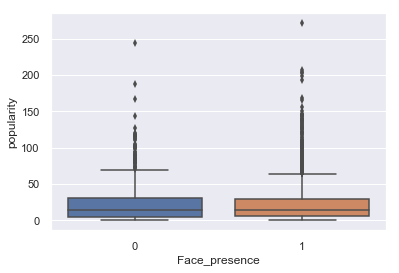

In [132]:
sns.boxplot(x='Face_presence', y='popularity', data=f_df)

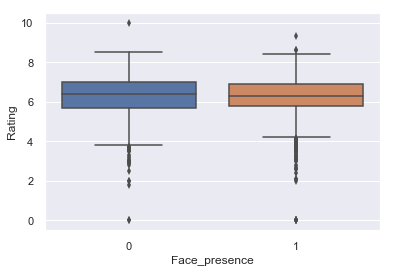

In [133]:
sns.boxplot(x='Face_presence', y='Rating', data=f_df)

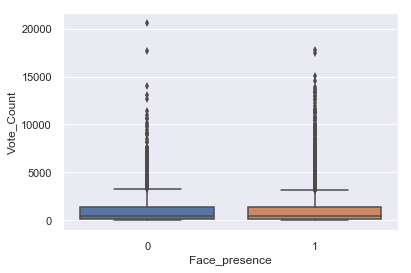

In [140]:
sns.boxplot(x='Face_presence', y='Vote_Count', data=f_df)

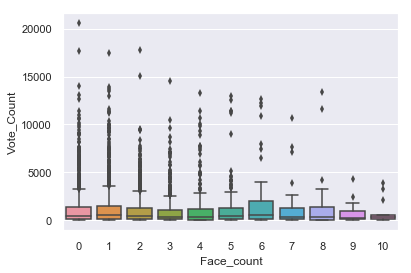

In [170]:
sns.boxplot(x='Face_count', y='Vote_Count', data=f_df)

In [168]:
# Logged Vote_count
f_df['Vote_count_log'] = np.log(f_df['Vote_Count'])
f_df.head(10)
f_df = f_df[f_df.Face_count <= 10]


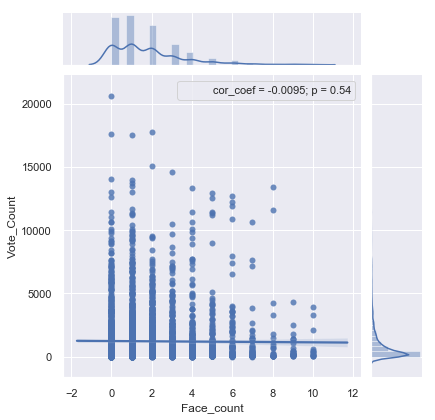

In [169]:
from scipy import stats
def cor_coef(x, y):
    return stats.pearsonr(x, y)[0], stats.pearsonr(x, y)[1]
sns.jointplot(x='Face_count', y='Vote_Count', data=f_df, kind='reg', stat_func=cor_coef)

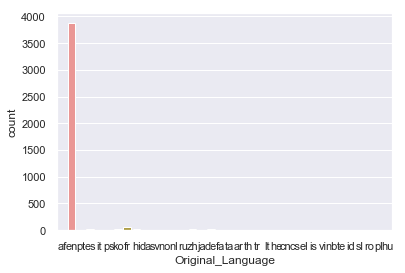

In [142]:


sns.countplot('Original_Language', data = f_df)

In [81]:
# the move with the 26 face on it!
df.Title[df.Face_count==26]

3501    The Longest Day
Name: Title, dtype: object

Here is the link for this movie poster:
![The longest Day](https://image.tmdb.org/t/p/w600_and_h900_bestv2/7fnuirXJpuRHggi2lOCBEwZ3eWU.jpg)

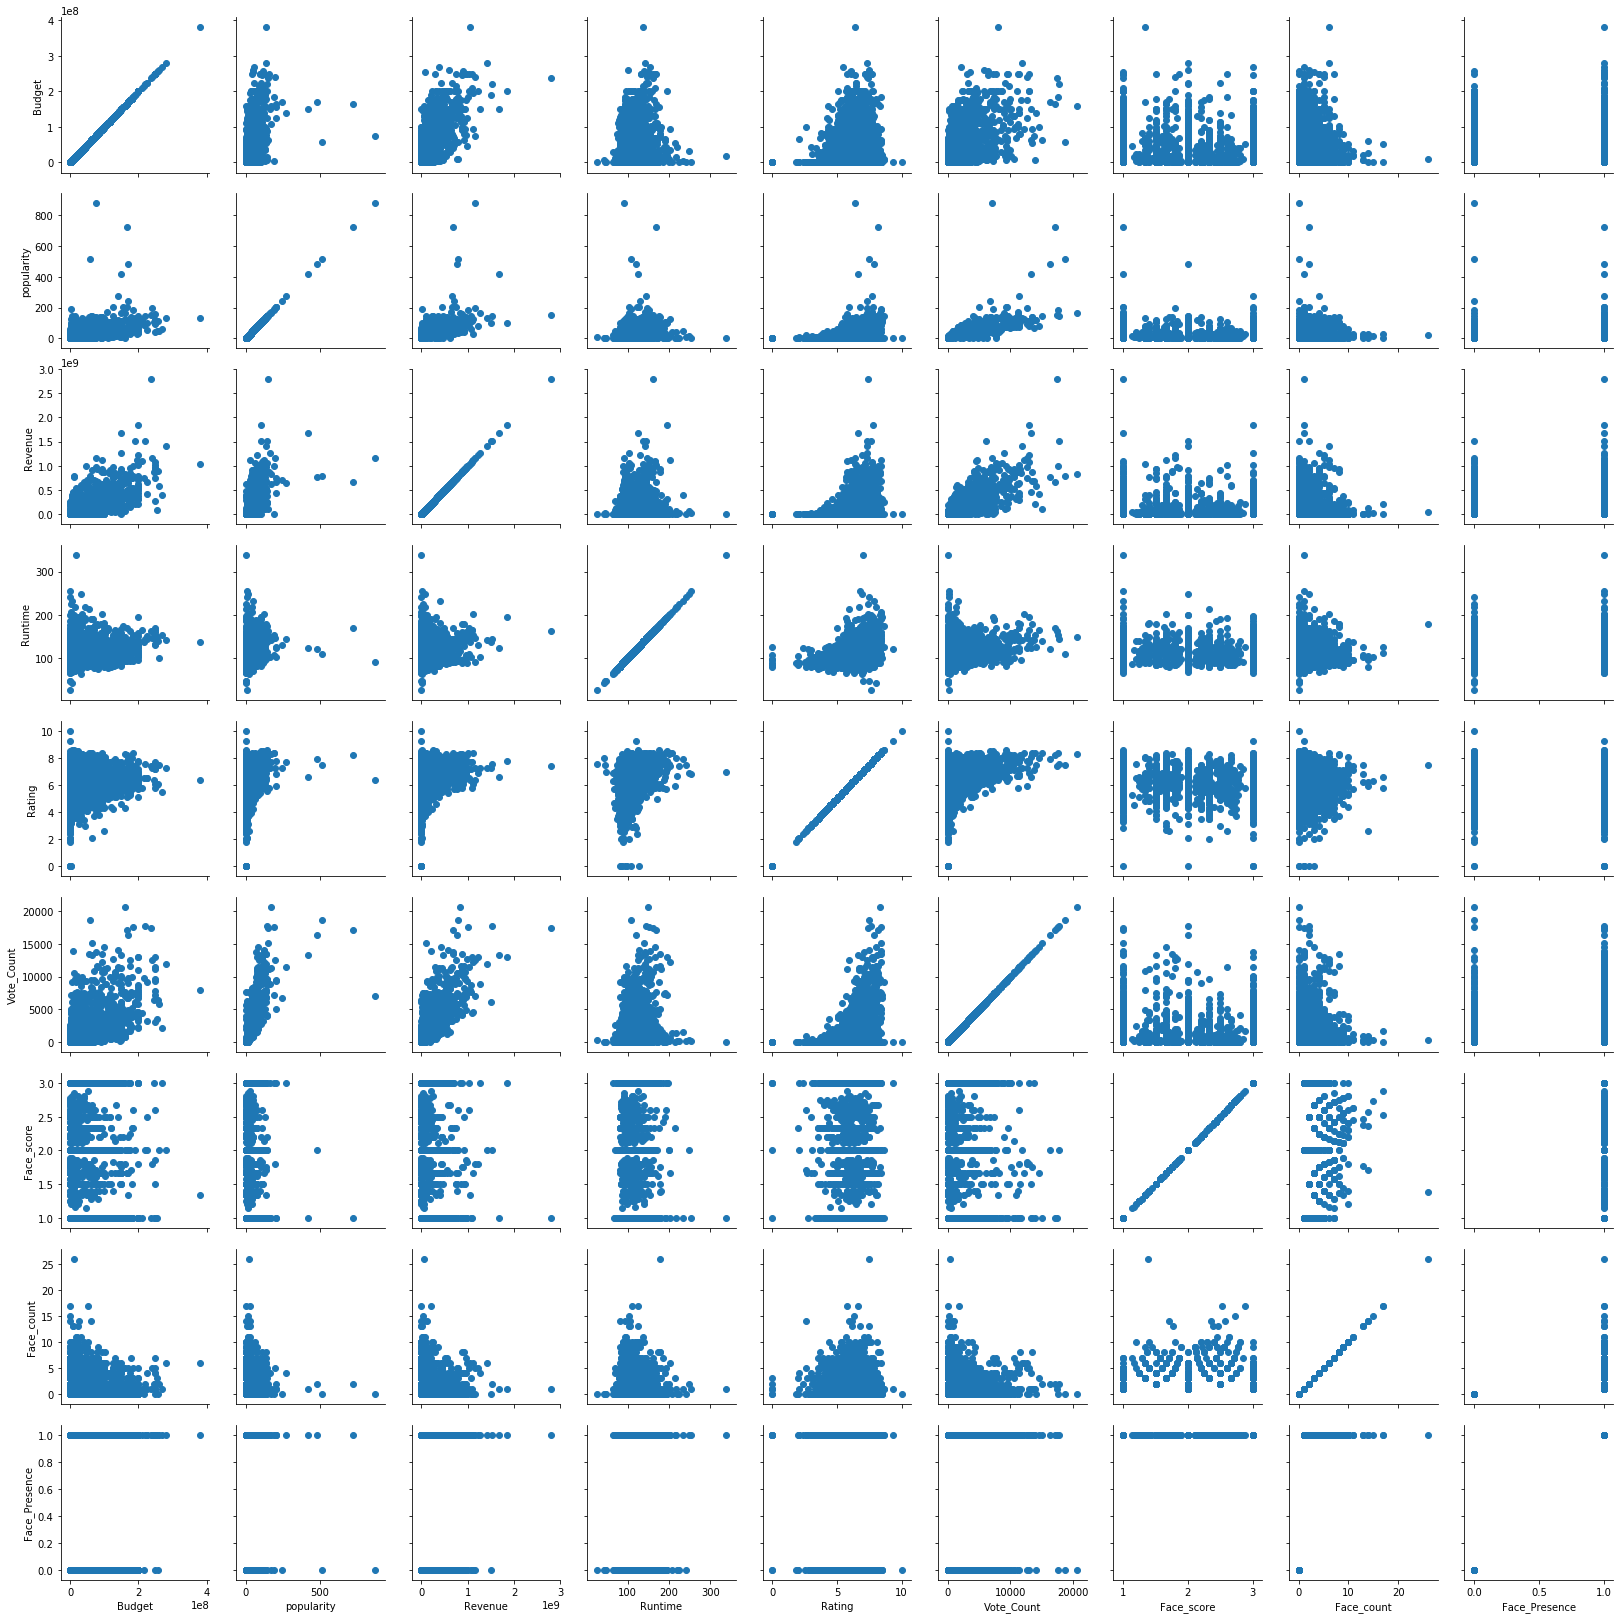

In [105]:
test.dtype
g= sns.PairGrid(data=df)
g = g.map(plt.scatter)

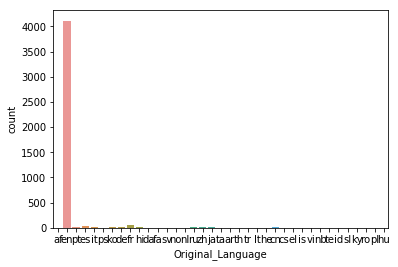

In [36]:
sns.countplot(x='Original_Language', data= m_df)

In [89]:
pd.value_counts(df.Original_Language == 'en')

True     3880
False     254
Name: Original_Language, dtype: int64

Notice that the majority of movies are in English. 

/home/fyousef/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


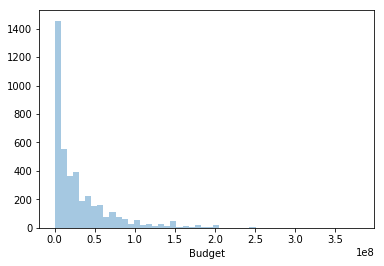

In [93]:
sns.distplot(df.Budget, kde=False)

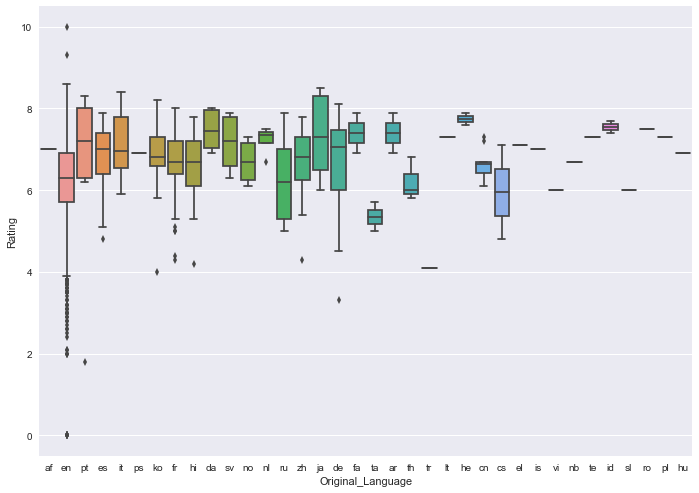

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='Original_Language', y='Rating', data= df)


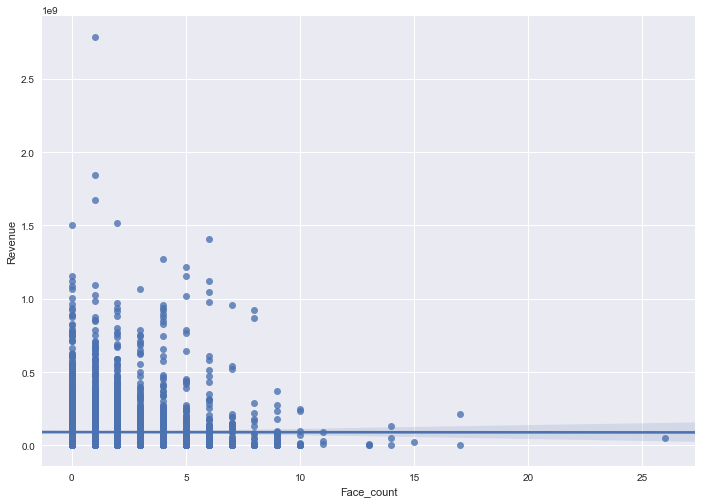

In [38]:
# Log based face_score and rating
fig, ax = plt.subplots()
#ax.set(xscale="log", yscale="log")

sns.regplot(x="Face_count", y='Revenue', data= df, ax=ax)
plt.show()

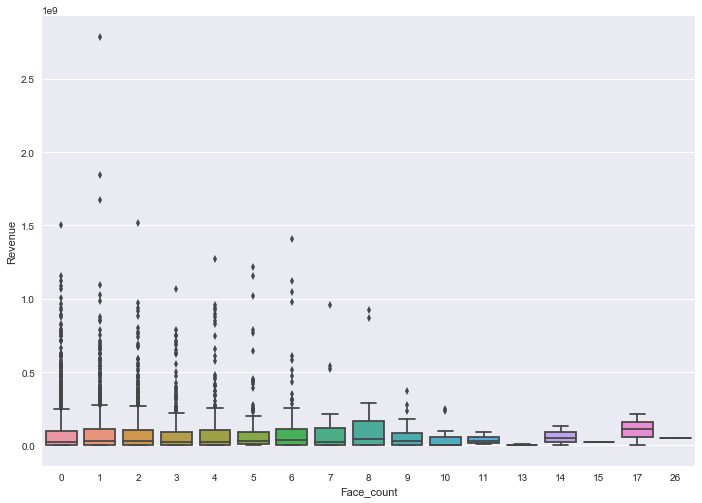

In [39]:
sns.boxplot(x='Face_count', y='Revenue', data=df)

One thing that might be important to notice is that we have a lot of zeros for Revenue. What does this means? Does it mean that those movies never sold a thicket? Probabley not true! 

Let attempt to replace those 0's with `NaN`. 

In [45]:
#Batck up our dataframe
tdf = df

tdf['Revenue']=tdf['Revenue'].replace({0: np.NaN})

#df['Revenue'][df.Revenue==0]== np.nan

In [48]:
tdf.head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,Tsotsi,3000000,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137,1.000000,1,1
2827,District 9,30000000,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066,NaN,0,0
2918,West Side Story,6000000,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727,NaN,0,0
1473,Elite Squad,4000000,pt,23.604936,10/12/2007,NaN,115.0,8.0,896,1.000000,2,1
631,Slumdog Millionaire,15000000,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195,3.000000,2,1
3835,City of Ember,55000000,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895,NaN,0,0
2882,Rampage,0,en,7.101197,8/14/2009,NaN,85.0,5.9,186,NaN,0,0
2230,Wild Wild West,170000000,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646,1.666667,3,1
2690,Christmas Eve,0,en,1.985243,12/4/2015,NaN,95.0,5.5,37,2.428571,7,1
1070,The Midnight Meat Train,15000000,en,19.913961,8/7/2008,3533227.0,98.0,6.0,412,3.000000,1,1


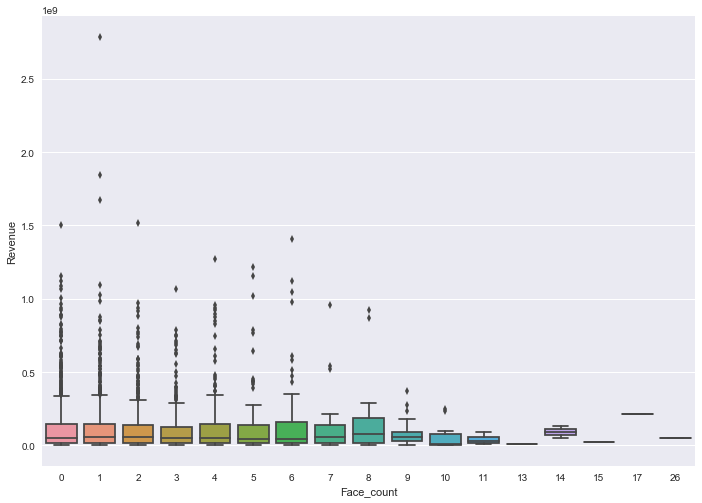

In [49]:
# now plotting it again:
sns.boxplot(x='Face_count', y='Revenue', data=tdf)

Lets do the same thing for Budget

In [54]:
tdf['Budget']=tdf['Budget'].replace({0: np.NaN})

In [55]:
tdf.head(10)

,Title,Budget,Original_Language,popularity,release_date,Revenue,Runtime,Rating,Vote_Count,Face_score,Face_count,Face_Presence
2231,Tsotsi,3000000.0,af,2.504169,8/18/2005,9879971.0,94.0,7.0,137,1.000000,1,1
2827,District 9,30000000.0,en,63.136780,8/5/2009,210819611.0,112.0,7.3,5066,NaN,0,0
2918,West Side Story,6000000.0,en,23.431117,10/18/1961,43656822.0,152.0,7.3,727,NaN,0,0
1473,Elite Squad,4000000.0,pt,23.604936,10/12/2007,NaN,115.0,8.0,896,1.000000,2,1
631,Slumdog Millionaire,15000000.0,en,59.258969,5/12/2008,377910544.0,120.0,7.7,5195,3.000000,2,1
3835,City of Ember,55000000.0,en,23.465539,10/7/2008,17869048.0,90.0,6.2,895,NaN,0,0
2882,Rampage,NaN,en,7.101197,8/14/2009,NaN,85.0,5.9,186,NaN,0,0
2230,Wild Wild West,170000000.0,en,40.748915,6/29/1999,222104681.0,106.0,5.2,1646,1.666667,3,1
2690,Christmas Eve,NaN,en,1.985243,12/4/2015,NaN,95.0,5.5,37,2.428571,7,1
1070,The Midnight Meat Train,15000000.0,en,19.913961,8/7/2008,3533227.0,98.0,6.0,412,3.000000,1,1


In [ ]:
# 

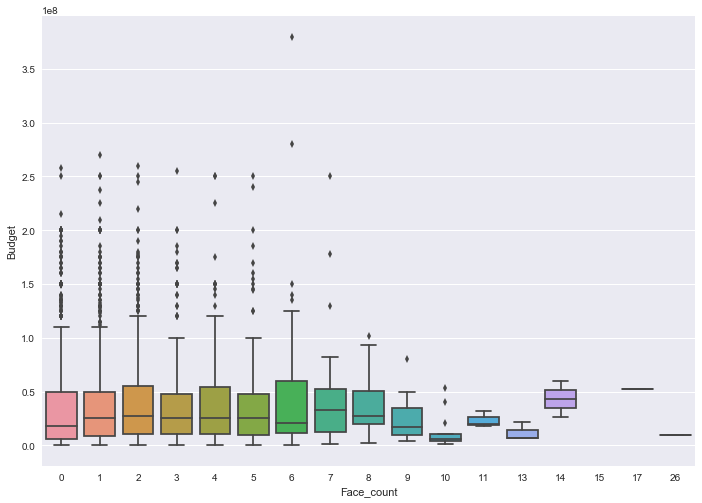

In [56]:
# now plotting it:
sns.boxplot(x='Face_count', y='Budget', data=tdf)

I want to also look at the distribution of ratings accross the posters with or without faces on them. 

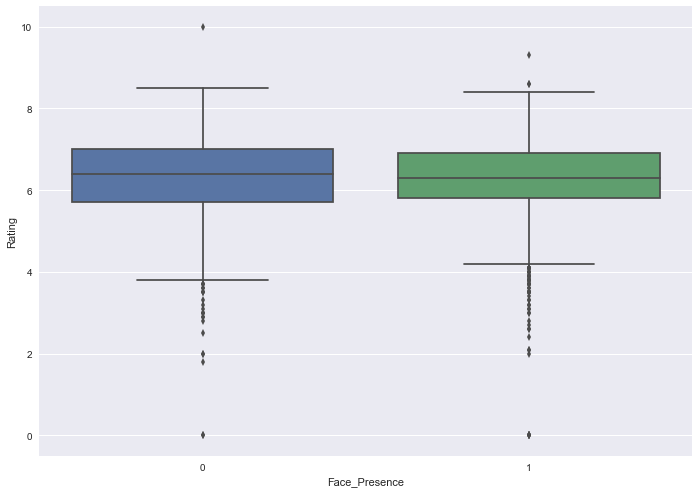

In [57]:
sns.boxplot(x='Face_Presence', y='Rating', data=df)

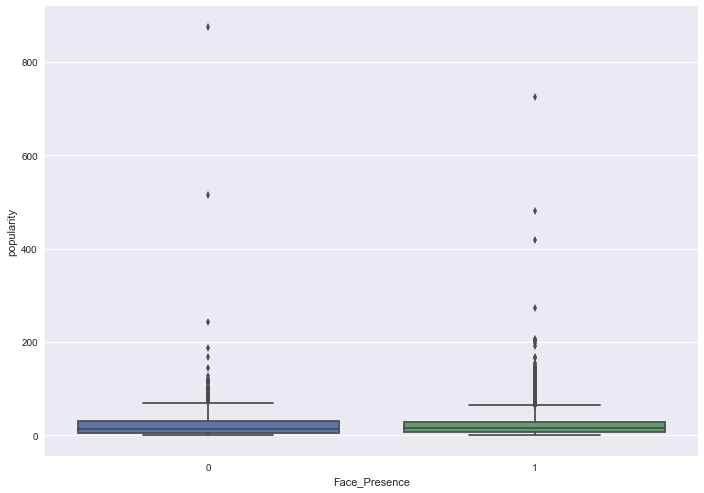

In [58]:
sns.boxplot(x='Face_Presence', y='popularity', data=df)